# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [640]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

In [642]:
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [644]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].value_counts().count()

249

In [646]:
mouse_study_df.groupby('Mouse ID').size()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Length: 249, dtype: int64

In [648]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [650]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [652]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']

In [654]:
# Checking the number of mice in the clean DataFrame.
mouse_study_df['Mouse ID'].value_counts().count()

248

## Summary Statistics

In [657]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_tumor = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

tumor_vol_for_regimen = pd.DataFrame({
    "Mean Tumor Volume":drug_regimen_tumor.mean(),
    "Median Tumor Volume":drug_regimen_tumor.median(),
    "Tumor Volume Variance":drug_regimen_tumor.var(),
    "Tumor Volume Std. Dev.":drug_regimen_tumor.std(),
    "Tumor Volume Std. Err.":drug_regimen_tumor.sem()
})
tumor_vol_for_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [659]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

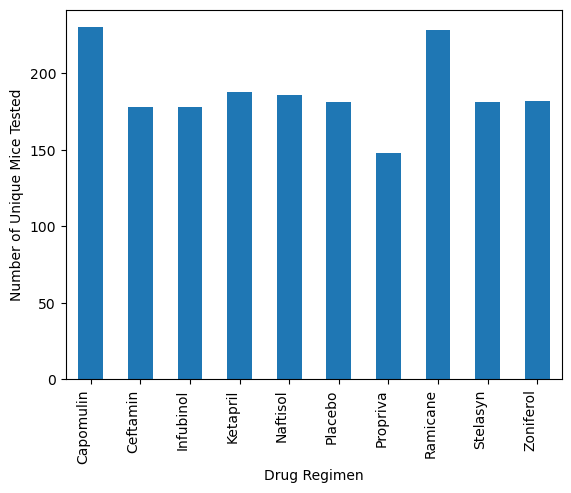

In [662]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_per_regimen = mouse_study_df.groupby('Drug Regimen')['Mouse ID'].count()

mouse_per_regimen.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.xticks(rotation=90, ha='right')
plt.show()

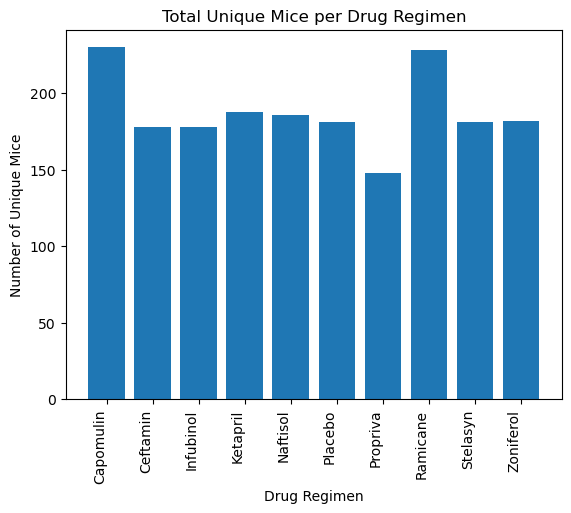

In [664]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
drug_regimen = mouse_per_regimen.index
counts = mouse_per_regimen.tolist()
plt.bar(drug_regimen, counts)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice')
plt.title('Total Unique Mice per Drug Regimen')
plt.xticks(rotation=90, ha='right')
plt.show()

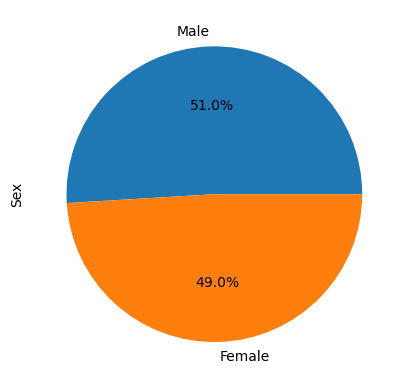

In [708]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_study_df['Sex'].value_counts()
mouse_sex.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

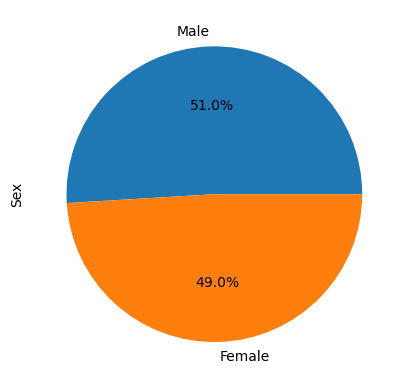

In [726]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex.index
plt.pie(mouse_sex, labels=labels, autopct='%1.1f%%', )
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


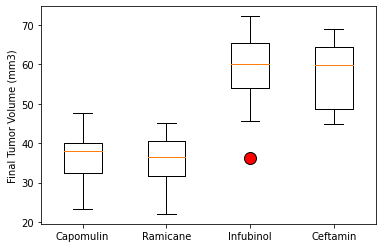

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

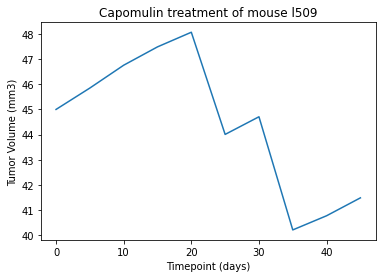

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


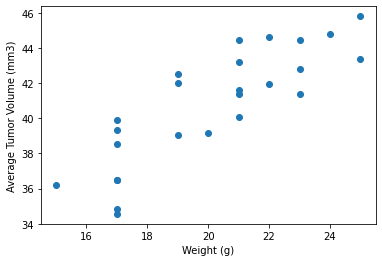

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


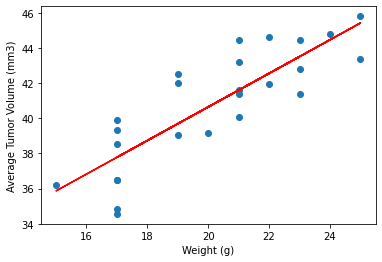

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
